<a href="https://colab.research.google.com/github/vladleshchuk/Time-Series-Forecasting-of-Rivne-Region-Climate-Characteristics/blob/main/2_Rivne_Perc_Mounths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 2_perc.xlsx to 2_perc.xlsx


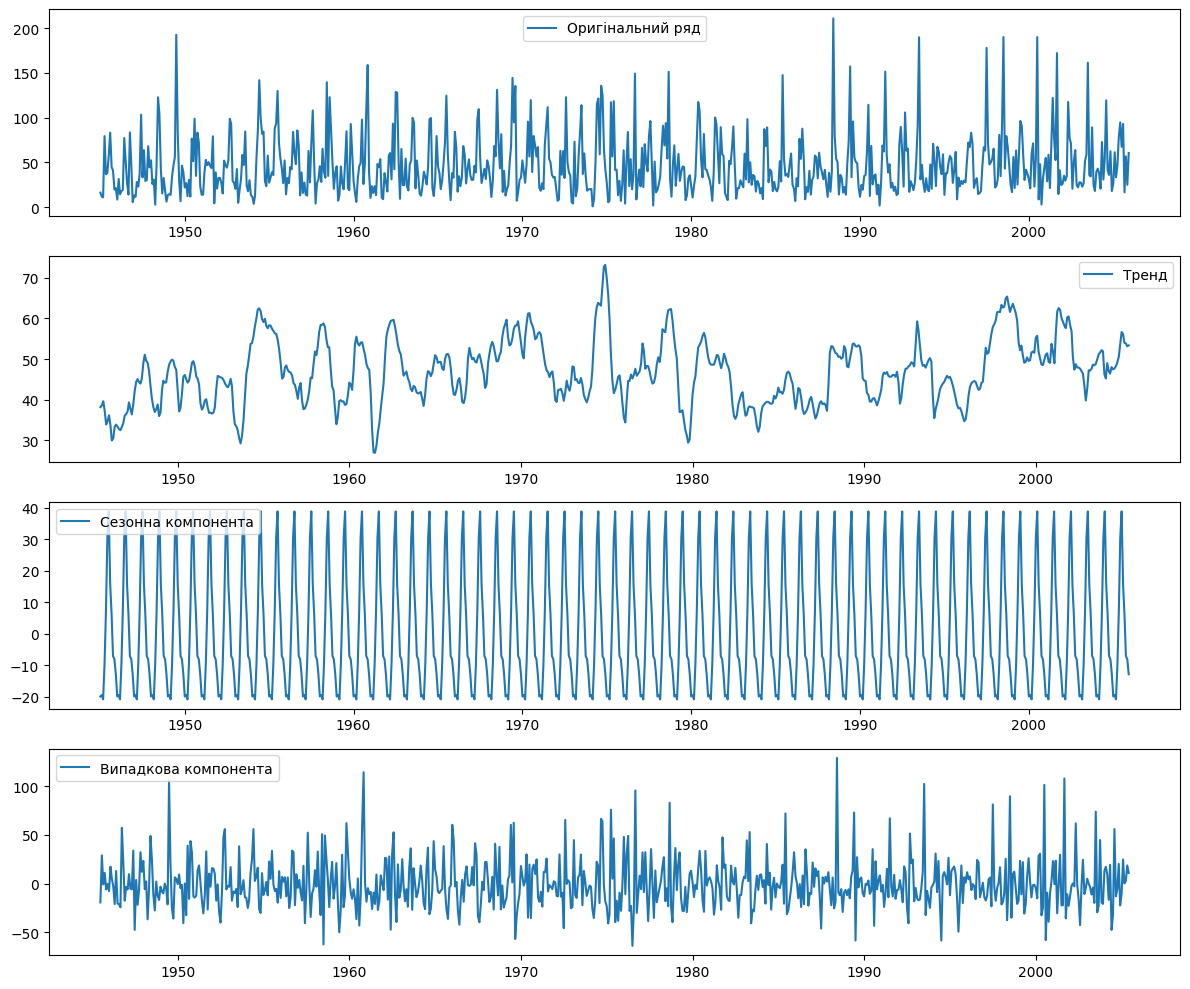

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from google.colab import files

# Завантаження файлу з опадами
uploaded = files.upload()
file = "2_perc.xlsx"  # новий файл з опадами

# Зчитування Excel-файлу
df = pd.read_excel(file)

# Перетворення стовпця DATE у datetime (формат дати: день.місяць.рік)
df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True)

# Встановлення дати як індекс
df.set_index('DATE', inplace=True)

# Вибір ряду опадів (якщо дані в стовпці "RIVNE")
opady_series = df['RIVNE']

# Декомпозиція ряду з періодом 12 місяців
decomposition = seasonal_decompose(opady_series, model='additive', period=12)

# Візуалізація результатів
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(opady_series, label='Оригінальний ряд')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Тренд')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Сезонна компонента')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Випадкова компонента')
plt.legend()

plt.tight_layout()
plt.show()


Saving 2_perc.xlsx to 2_perc (1).xlsx


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvyzugipz/uzjptzeq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvyzugipz/g40ahkcq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17990', 'data', 'file=/tmp/tmpvyzugipz/uzjptzeq.json', 'init=/tmp/tmpvyzugipz/g40ahkcq.json', 'output', 'file=/tmp/tmpvyzugipz/prophet_modeljennlro_/prophet_model-20250605172450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:24:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:24:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

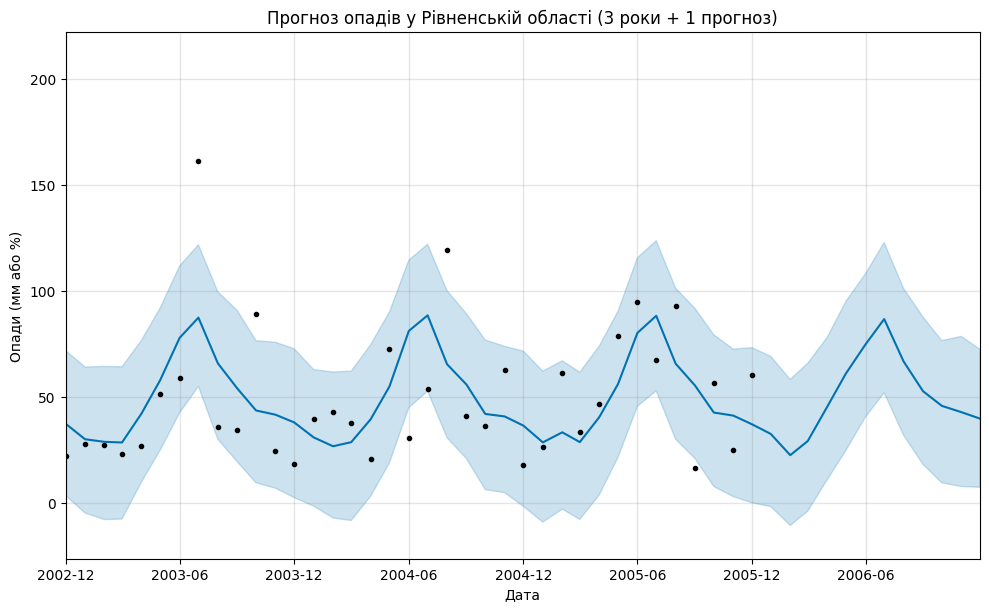

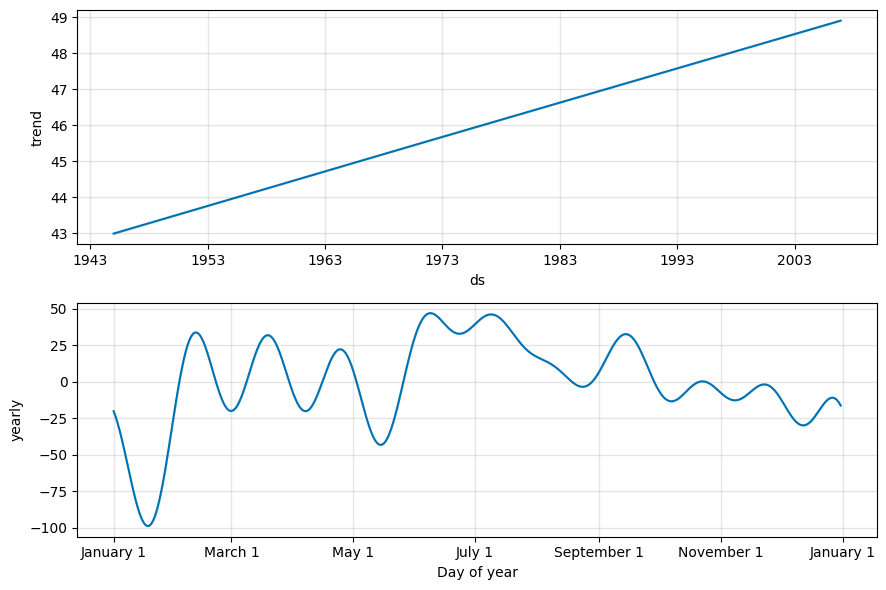

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from google.colab import files

# Завантаження Excel-файлу з опадами
uploaded = files.upload()

# Зчитування Excel-файлу
file = "2_perc.xlsx"
df = pd.read_excel(file)

# Перетворення дати
df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True)

# Перейменування колонок для Prophet
df_prophet = df.rename(columns={'DATE': 'ds', 'RIVNE': 'y'})

# Створення та навчання моделі
model = Prophet(yearly_seasonality=True, seasonality_mode='additive')
model.fit(df_prophet)

# Прогноз на 1 рік (12 місяців)
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# 📅 Відображення тільки останніх 3 років + 1 рік прогнозу
last_date = df_prophet['ds'].max()
start_display = last_date - pd.DateOffset(years=3)
end_display = forecast['ds'].max()

# Побудова графіка прогнозу з обмеженням по осі X
fig1 = model.plot(forecast)
plt.xlim([start_display, end_display])
plt.title("Прогноз опадів у Рівненській області (3 роки + 1 прогноз)")
plt.ylabel("Опади (мм або %)")
plt.xlabel("Дата")
plt.grid(True)
plt.show()

# Компоненти прогнозу
fig2 = model.plot_components(forecast)
plt.show()
